In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/colabnotebook/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# since here is all , just because unlabelled data
# i need to convert data in numpy matrix
x = df[[	'Age','Spending Score (1-100)']].values
x

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

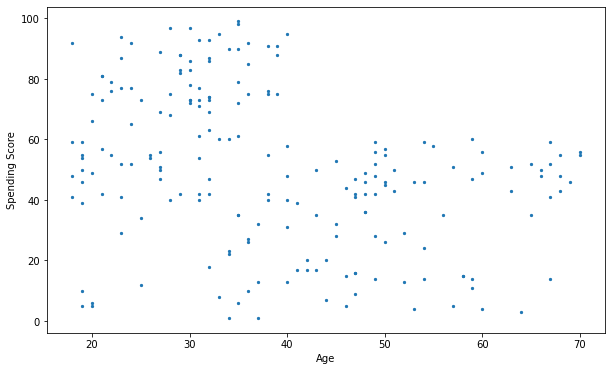

In [ ]:
# plot the data points || original shape
plt.figure(figsize=(10,6))
plt.scatter(x[:,0] ,x[:,1],s=5) # x[:,0] = age column , x[:,1]= annual income
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
# apply algorithm
# load algorithm
from sklearn.cluster import KMeans

In [ ]:
model = KMeans()
model.fit(x) # only features data

KMeans()

In [ ]:
# how many cluster create by model by default
model.n_clusters

8

In [ ]:
# wcss(error) || technical term inertia
model.inertia_

13070.888156288156

In [ ]:
round(model.inertia_)

13071

In [ ]:
# Elbow method
err=[]
for i in range(1,15):
  model1 = KMeans(n_clusters=i)
  model1.fit(x) # only features data
  print('Cluster number ->', i , '  || Error ->', round(model1.inertia_))
  # store the error in list err
  err.append(round(model1.inertia_))

Cluster number -> 1   || Error -> 171536
Cluster number -> 2   || Error -> 75949
Cluster number -> 3   || Error -> 45841
Cluster number -> 4   || Error -> 28166
Cluster number -> 5   || Error -> 23810
Cluster number -> 6   || Error -> 19498
Cluster number -> 7   || Error -> 15524
Cluster number -> 8   || Error -> 13083
Cluster number -> 9   || Error -> 11451
Cluster number -> 10   || Error -> 10302
Cluster number -> 11   || Error -> 9410
Cluster number -> 12   || Error -> 8715
Cluster number -> 13   || Error -> 8104
Cluster number -> 14   || Error -> 7376


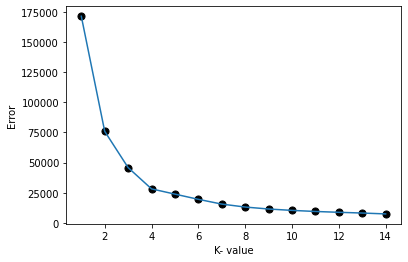

In [ ]:
# Plot the elbow
plt.plot(range(1,15), err)
plt.scatter(range(1,15), err, marker='o', c='black', s=50)
plt.xlabel('K- value')
plt.ylabel('Error')
plt.show()

In [ ]:

# we are building model with k= 10
model2 = KMeans(n_clusters=10)
model2.fit(x)
# get pridiction
y_kmean = model2.predict(x)  #  y_kmean = pred

In [ ]:
y_kmean

array([9, 1, 7, 1, 9, 1, 7, 5, 8, 1, 8, 5, 8, 1, 4, 1, 9, 3, 0, 5, 9, 1,
       4, 1, 8, 1, 0, 3, 0, 5, 8, 1, 8, 5, 4, 1, 4, 1, 0, 1, 2, 5, 0, 3,
       0, 3, 6, 9, 9, 9, 6, 3, 3, 2, 6, 6, 6, 2, 3, 6, 2, 3, 2, 6, 2, 3,
       6, 2, 3, 9, 2, 6, 2, 2, 2, 3, 6, 6, 3, 6, 2, 6, 2, 6, 3, 6, 6, 3,
       3, 6, 2, 9, 6, 0, 9, 3, 6, 3, 6, 3, 9, 6, 2, 3, 6, 9, 2, 6, 2, 2,
       2, 3, 9, 3, 3, 3, 2, 6, 6, 6, 3, 9, 6, 5, 9, 1, 0, 5, 8, 1, 4, 1,
       9, 1, 7, 5, 4, 1, 7, 1, 8, 5, 9, 5, 7, 5, 0, 1, 4, 5, 4, 5, 4, 1,
       4, 5, 7, 1, 7, 1, 0, 5, 7, 5, 0, 1, 4, 5, 0, 3, 4, 1, 4, 5, 8, 5,
       8, 1, 8, 5, 0, 5, 4, 5, 0, 5, 0, 1, 4, 5, 4, 1, 7, 5, 4, 1, 0, 1,
       4, 5], dtype=int32)

In [ ]:
# centroid coordinate
model2.cluster_centers_

array([[45.        , 31.5       ],
       [29.1       , 74.83333333],
       [64.85      , 49.85      ],
       [24.56      , 55.68      ],
       [41.72222222, 15.11111111],
       [31.37037037, 90.7037037 ],
       [48.14814815, 49.51851852],
       [26.88888889,  6.        ],
       [58.27272727, 10.18181818],
       [28.52941176, 39.88235294]])

In [ ]:
# datapoints which goes to cluster id =0 || cluster 1
temp_age = x[y_kmean==0,0]

In [ ]:
temp_age

array([52, 45, 40, 36, 48, 49, 40, 43, 48, 56, 50, 36, 37, 41, 54, 45])

In [ ]:
temp_SpendingScore = x[y_kmean==0,1]

In [ ]:
temp_SpendingScore

array([29, 32, 31, 26, 36, 28, 40, 35, 36, 35, 26, 27, 32, 39, 24, 28])

In [ ]:
# tabular representation
cluster_1 = pd.DataFrame({'Age' :temp_age , 'Spending Score' : temp_SpendingScore })
cluster_1

,Age,Spending Score
0,52,29
1,45,32
2,40,31
3,36,26
4,48,36
5,49,28
6,40,40
7,43,35
8,48,36
9,56,35


In [ ]:
# tabular representation
cluster_2 = pd.DataFrame({'Age' :x[y_kmean==1,0] , 'Spending Score' : x[y_kmean==1,1] })
cluster_2

,Age,Spending Score
0,21,81
1,23,77
2,22,76
3,30,72
4,24,77
5,22,79
6,25,73
7,31,73
8,29,82
9,21,73


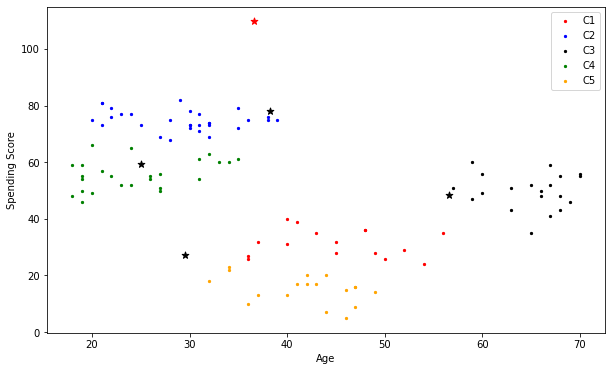

In [ ]:
# cluster vis
plt.figure(figsize=(10,6))
# =============putting cluster 1
plt.scatter(x[y_kmean==0,0],x[y_kmean==0,1] , s = 5 , c ='red', label='C1')
# put centroid
plt.scatter(25.06451613,  59.48387097 , s = 50 , c ='black', marker='*')
# ==============putting cluster 2
plt.scatter(x[y_kmean==1,0],x[y_kmean==1,1] , s = 5 , c ='blue', label='C2')
# put centroid
plt.scatter( 29.53658537,  27.24390244, s = 50 , c ='black', marker='*')
# ==============putting cluster 3
plt.scatter(x[y_kmean==2,0],x[y_kmean==2,1] , s = 5 , c ='black', label='C3')
# put centroid
plt.scatter( 36.6       , 109.7 , s = 50 , c ='red', marker='*')
# ==============putting cluster 4
plt.scatter(x[y_kmean==3,0],x[y_kmean==3,1] , s = 5 , c ='green', label='C4')
# put centroid
plt.scatter(56.62      ,  48.48 , s = 50 , c ='black', marker='*')
# ==============putting cluster 5
plt.scatter(x[y_kmean==4,0],x[y_kmean==4,1] , s = 5 , c ='orange', label='C5')
# put centroid
plt.scatter(38.25862069,  78.15517241 , s = 50 , c ='black', marker='*')

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
# conclusion : in Cluster 1 we found some persons whose Age between 35 to 57
# thet have Spending Score between 20 to 40


# conclusion : in Cluster 2 we found some persons whose Age between 20 to 40
# thet have Spending Score between 65 to 80

# conclusion : in Cluster 3 we found some persons whose Age between 56 to 70
# thet have Spending Score between 35 to 60

# conclusion : in Cluster 4 we found some persons whose Age between 10 to 35
# thet have Spending Score between 35 to 65

# conclusion : in Cluster 5 we found some persons whose Age between 31 to 59
# thet have Spending Score between 5 to 20

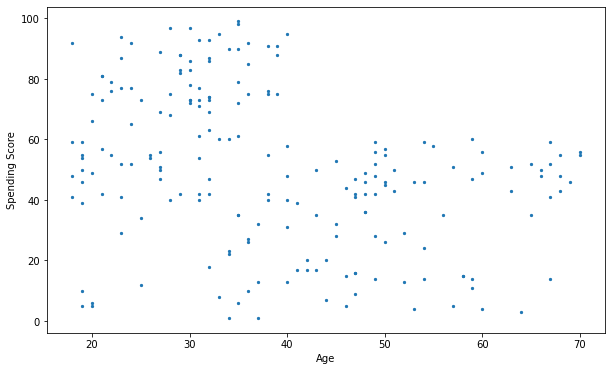

In [ ]:
# original shape
plt.figure(figsize=(10,6))
plt.scatter(x[:,0] ,x[:,1],s=5) # x[:,0] = age column , x[:,1]= annual income
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')